<a href="https://colab.research.google.com/github/CherylA24/HistogramEqualization/blob/main/HistogramEqualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Read input image
img = cv.imread('low_contrast.jpg')

#Change image into gray scale 
gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

"""
 STEP 1 : CALCULATE NORMALIZED CDF (CUMULATIVE DISTRIBUTIVE FUNCTION)
"""

In [ ]:
# Flatten image and calculate histogram via binning
histogram,bins = np.histogram(gray_img.flatten(),256,[0,256])

# Calculate normalized cdf (before transform)
cdf = histogram.cumsum()
cdf_normalized = cdf * float(histogram.max()) / cdf.max()

"""
STEP 2 : DERIVE INTENSITY-MAPPING LOOKUP TABLE
"""

In [ ]:
# Pixel mapping look up table
cdf_mask = np.ma.masked_equal(cdf,0)
cdf_mask = (cdf_mask - cdf_mask.min())*255/(cdf_mask.max()-cdf_mask.min())
cdf = np.ma.filled(cdf_mask,0).astype('uint8')

""""
STEP 3 : TRANSFORM PIXEL INTENSITY OF THE ORIGINAL IMAGE WITH THE LOOK UP TABLE
"""

In [ ]:
result_img = cdf[gray_img]

In [ ]:
# Calculate the normalized cdf after transform
histogram_eq,binss = np.histogram(result_img.flatten(),256,[0,256])
cdf_eq = histogram_eq.cumsum()
cdf_eq_normalized = cdf_eq * float(histogram_eq.max()) / cdf_eq.max()

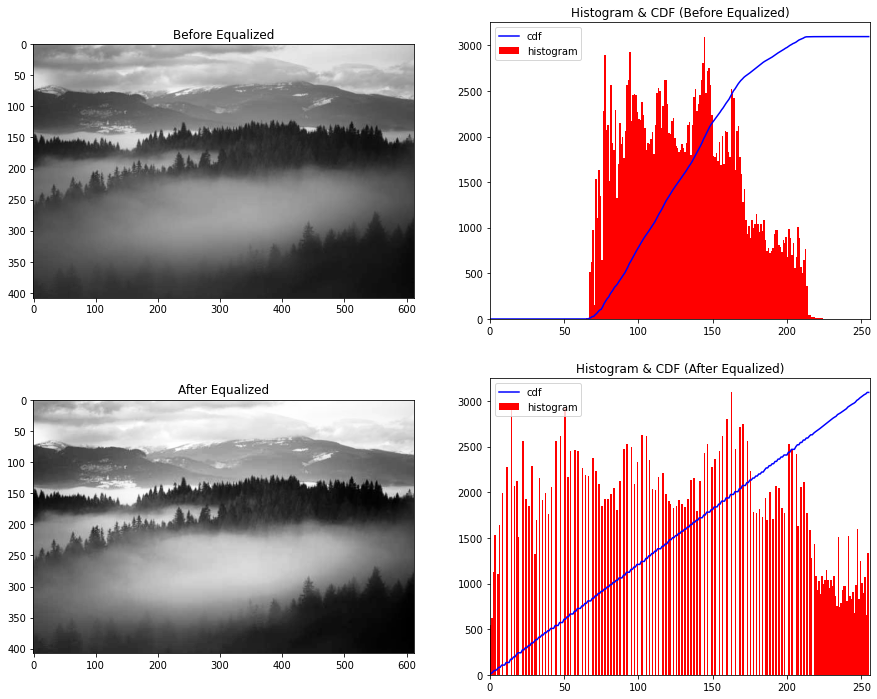

In [ ]:
# Show the image with its histogram and cdf
plt.figure(figsize=(15,12))
plt.subplot(2,2,1)
plt.imshow(gray_img, cmap='gray')
plt.title('Before Equalized')

plt.subplot(2,2,2)
plt.plot(cdf_normalized, color = 'b')
plt.hist(gray_img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.title('Histogram & CDF (Before Equalized)')

plt.subplot(2,2,3)
plt.imshow(result_img, cmap='gray')
plt.title('After Equalized')

plt.subplot(2,2,4)
plt.plot(cdf_eq_normalized, color = 'b')
plt.hist(result_img.flatten(),256,[0,256], color='r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.title('Histogram & CDF (After Equalized)')

plt.show()